# Exploratory Analysis of CrossFit Athletes

When planning my first data science project to showcase in my portfolio, I spent a lot of time envisioning something robust, with multiple advanced tools and techniques. However, I realized that this pursuit of 'perfection' was delaying both practice and the demonstration of the skills I already possess. Therefore, I decided to start with something more straightforward: a simple exploratory analysis that could pave the way for new insights and future, more elaborate projects. I chose CrossFit as the theme, both because it is a personal passion and due to my prior knowledge of the sport.

The detailed dataset has been compiled from competitions and events held globally. This dataset contains data on athlete demographics, including age, gender, and experience in training, alongside performance metrics like time, weight lifted, and personal records.

My goal is to uncover patterns and correlations to understand how performance can be improved and how physiology interferes with the results of the athletes.

In [1]:
# Bibliotecas para análise e manipulação de dados
import numpy as np
import pandas as pd

In [2]:
# Carregando o dataset dos atletas a partir de um arquivo CSV
data = pd.read_csv('athletes.csv')

In [3]:
data.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  423003 non-null  float64
 1   name        331110 non-null  object 
 2   region      251262 non-null  object 
 3   team        155160 non-null  object 
 4   affiliate   241916 non-null  object 
 5   gender      331110 non-null  object 
 6   age         331110 non-null  float64
 7   height      159869 non-null  float64
 8   weight      229890 non-null  float64
 9   fran        55426 non-null   float64
 10  helen       30279 non-null   float64
 11  grace       40745 non-null   float64
 12  filthy50    19359 non-null   float64
 13  fgonebad    29738 non-null   float64
 14  run400      22246 non-null   float64
 15  run5k       36097 non-null   float64
 16  candj       104435 non-null  float64
 17  snatch      97280 non-null   float64
 18  deadlift    115323 non-null  float64
 19  ba

In [5]:
data.shape

(423006, 27)

In [6]:
data.columns

Index(['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age',
       'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad',
       'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups',
       'eat', 'train', 'background', 'experience', 'schedule', 'howlong'],
      dtype='object')

In [7]:
# Creating a copy of the original dataset to preserve it while performing transformations
data1=data.copy()

In [8]:
# Dropping unnecessary columns that are not relevant for the analysis
data1.drop(columns=['athlete_id', 'name', 'region', 'team', 'affiliate'], inplace=True)

In [9]:
# Removing rows with missing values (NaN) from the dataframe and checking if there are any remaining missing values
data1.dropna(inplace=True)
data1.isna().sum()

gender        0
age           0
height        0
weight        0
fran          0
helen         0
grace         0
filthy50      0
fgonebad      0
run400        0
run5k         0
candj         0
snatch        0
deadlift      0
backsq        0
pullups       0
eat           0
train         0
background    0
experience    0
schedule      0
howlong       0
dtype: int64

In [10]:
data1.shape

(2106, 22)

After dropping the first categorical columns, now analyzing the last categorical columns more carefully

In [11]:

# Checking the unique values in the 'eat' column to understand its categories
data1['eat'].unique()

array(["I eat quality foods but don't measure the amount|I eat 1-3 full cheat meals per week|",
       "I eat quality foods but don't measure the amount|",
       "I eat quality foods but don't measure the amount|I eat whatever is convenient|I eat 1-3 full cheat meals per week|",
       "I eat quality foods but don't measure the amount|I eat whatever is convenient|",
       'I eat strict Paleo|I eat 1-3 full cheat meals per week|',
       'I eat whatever is convenient|',
       "I eat strict Paleo|I eat quality foods but don't measure the amount|",
       'I weigh and measure my food|I eat strict Paleo|I eat 1-3 full cheat meals per week|',
       'I weigh and measure my food|I eat strict Paleo|',
       'I weigh and measure my food|',
       "I eat strict Paleo|I eat quality foods but don't measure the amount|I eat 1-3 full cheat meals per week|",
       'I weigh and measure my food|I eat 1-3 full cheat meals per week|',
       'I eat strict Paleo|',
       'I weigh and measure my foo

All unique values are combinations of a few phrases. This applies to all categorical columns.
Therefore, we will identify and isolate these phrases for further analysis.

In [12]:
# Calculating the total number of unique counts of values
data1['eat'].value_counts().value_counts().sum()

30

In [13]:
# Function to process a column by splitting its values into individual phrases and removing duplicates
def processar_linhas(dataframe,coluna):
    frases=set()
    for linha in dataframe[coluna]:
        partes=linha.split('|')
        for parte in partes:
            frases.add(parte.strip())
    return list(frases)

In [14]:
# Unique phrases
processar_linhas(data1,'eat')

['',
 'I eat whatever is convenient',
 "I eat quality foods but don't measure the amount",
 'I eat strict Paleo',
 'I eat 1-3 full cheat meals per week',
 'Decline to answer',
 'I weigh and measure my food']

In [15]:
# Function to process multiple columns, extracting unique phrases and counting unique values for each column
def processar_colunas(dataframe, colunas):
    resultados={}
    for coluna in colunas:
        frases= processar_linhas(dataframe,coluna)
        contagem_unicos= dataframe[coluna].value_counts().value_counts().sum()
        resultados[coluna]={'frases_unicas':frases, 'contagem_unicos':contagem_unicos}
    return resultados

In [16]:
colunas_objects=['eat', 'train', 'background', 'experience', 'schedule', 'howlong']

In [17]:
# Unique Phrases
processar_colunas(data1, colunas_objects)

{'eat': {'frases_unicas': ['',
   'I eat whatever is convenient',
   "I eat quality foods but don't measure the amount",
   'I eat strict Paleo',
   'I eat 1-3 full cheat meals per week',
   'Decline to answer',
   'I weigh and measure my food'],
  'contagem_unicos': 30},
 'train': {'frases_unicas': ['',
   'I record my workouts',
   'Decline to answer',
   'I write my own programming',
   'I incorporate CrossFit.com workouts',
   'I workout mostly at home, work, or a traditional gym',
   'I have a coach who determines my programming',
   'I workout mostly at a CrossFit Affiliate'],
  'contagem_unicos': 61},
 'background': {'frases_unicas': ['',
   'I played college sports',
   'I played professional sports',
   'Decline to answer',
   'I played youth or high school level sports',
   'I regularly play recreational sports',
   'I have no athletic background besides CrossFit'],
  'contagem_unicos': 25},
 'experience': {'frases_unicas': ['',
   'I have attended one or more specialty cours

All columns contain 'Decline to answer,' and I see that this information could pollute our data. Therefore, I want to identify if there are many rows that contain this information, and if there are only a few rows compared to the total, I will just drop them.

In [18]:
# Function to count occurrences of "decline to answer" in each specified column, case-insensitive
def contar_decline_to_answer(dataframe, colunas):
    resultados = {} 
    for coluna in colunas:
        count = dataframe[coluna].str.strip().str.lower().str.contains("decline to answer").sum()
        resultados[coluna] = count    
    return resultados


In [19]:
# How many declined to answer
contar_decline_to_answer(data1, colunas_objects)

{'eat': 33,
 'train': 22,
 'background': 27,
 'experience': 19,
 'schedule': 30,
 'howlong': 15}

In [20]:
# Dropping rows containing "Decline to answer" in specific columns to clean the dataset
# Finally, checking the shape of the dataset after removing these rows
data1.drop((data1.loc[data1['eat'].str.contains('Decline to answer')].index), inplace=True)
data1.drop((data1.loc[data1['train'].str.contains('Decline to answer')].index), inplace=True)
data1.drop((data1.loc[data1['background'].str.contains('Decline to answer')].index), inplace=True)
data1.drop((data1.loc[data1['experience'].str.contains('Decline to answer')].index), inplace=True)
data1.drop((data1.loc[data1['schedule'].str.contains('Decline to answer')].index), inplace=True)
data1.drop((data1.loc[data1['howlong'].str.contains('Decline to answer')].index), inplace=True)
data1.shape


(2043, 22)

In [21]:
#Checking if 'Decline to answer' was indeed removed
processar_colunas(data1, colunas_objects)

{'eat': {'frases_unicas': ['',
   'I eat whatever is convenient',
   "I eat quality foods but don't measure the amount",
   'I eat strict Paleo',
   'I eat 1-3 full cheat meals per week',
   'I weigh and measure my food'],
  'contagem_unicos': 25},
 'train': {'frases_unicas': ['',
   'I record my workouts',
   'I write my own programming',
   'I incorporate CrossFit.com workouts',
   'I workout mostly at home, work, or a traditional gym',
   'I have a coach who determines my programming',
   'I workout mostly at a CrossFit Affiliate'],
  'contagem_unicos': 58},
 'background': {'frases_unicas': ['',
   'I played college sports',
   'I played professional sports',
   'I played youth or high school level sports',
   'I regularly play recreational sports',
   'I have no athletic background besides CrossFit'],
  'contagem_unicos': 22},
 'experience': {'frases_unicas': ['',
   'I have attended one or more specialty courses',
   'I train other people',
   'I began CrossFit by trying it alone 

I will leave these columns for now and move on to the numeric columns. At the end, and at a later stage, I will decide how to handle these categorical columns, but for now, we will ignore them.

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2043 entries, 12 to 406990
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      2043 non-null   object 
 1   age         2043 non-null   float64
 2   height      2043 non-null   float64
 3   weight      2043 non-null   float64
 4   fran        2043 non-null   float64
 5   helen       2043 non-null   float64
 6   grace       2043 non-null   float64
 7   filthy50    2043 non-null   float64
 8   fgonebad    2043 non-null   float64
 9   run400      2043 non-null   float64
 10  run5k       2043 non-null   float64
 11  candj       2043 non-null   float64
 12  snatch      2043 non-null   float64
 13  deadlift    2043 non-null   float64
 14  backsq      2043 non-null   float64
 15  pullups     2043 non-null   float64
 16  eat         2043 non-null   object 
 17  train       2043 non-null   object 
 18  background  2043 non-null   object 
 19  experience  2043 non-null   o

In [23]:
#TRansforming the only other column type objects into numerical
data1['gender'].value_counts()

gender
Male      1716
Female     327
Name: count, dtype: int64

In [24]:
# Mapping the 'gender' column to numeric values (0 for Male and 1 for Female) for easier analysis
data1['gender'] = data1['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [25]:
# Dropping columns with object data type (non-numeric) to focus on numerical data for analysis
data2=data1.drop(columns=colunas_objects)
data2.head()

,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
12,0,31.0,65.0,150.0,119.0,417.0,103.0,971.0,421.0,61.0,1211.0,290.0,225.0,465.0,405.0,81.0
102,0,24.0,68.0,180.0,126.0,449.0,86.0,988.0,425.0,58.0,1302.0,315.0,240.0,475.0,405.0,80.0
110,0,31.0,67.0,150.0,244.0,486.0,294.0,1217.0,330.0,63.0,1268.0,230.0,175.0,410.0,330.0,42.0
116,0,37.0,72.0,210.0,162.0,482.0,143.0,1243.0,366.0,66.0,1320.0,285.0,205.0,525.0,425.0,49.0
124,0,23.0,71.0,175.0,134.0,478.0,100.0,1196.0,442.0,53.0,1307.0,305.0,255.0,505.0,445.0,96.0


In [26]:
data2.shape

(2043, 16)

In [27]:
data2.describe()

,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,2043.000000,2043.000000,2.043000e+03,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2.043000e+03,2043.000000,2043.000000,2043.000000,2043.000000,2.043000e+03
mean,0.160059,33.689672,4.175438e+03,181.391581,297.375918,615.963779,512.417034,1642.641703,869.232991,262.133627,1.915066e+03,232.576114,179.731767,403.988253,328.873715,4.952039e+03
std,0.366750,7.008084,1.855889e+05,28.668721,393.986952,628.614075,10800.655596,4921.093221,22227.154233,6055.517630,2.367415e+04,73.232623,65.592721,105.046288,112.161628,2.206376e+05
min,0.000000,16.000000,1.000000e+00,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,4.000000,6.000000e+01,-45.000000,0.000000,-10.000000,0.000000,-1.000000e+00
25%,0.000000,29.000000,6.700000e+01,165.000000,176.000000,486.000000,132.000000,1190.000000,289.000000,60.000000,1.208500e+03,195.000000,150.000000,350.000000,275.000000,2.600000e+01
50%,0.000000,33.000000,7.000000e+01,183.000000,232.000000,540.000000,172.000000,1418.000000,327.000000,68.000000,1.320000e+03,235.000000,180.000000,415.000000,335.000000,3.600000e+01
75%,0.000000,38.000000,7.200000e+01,200.000000,317.000000,619.000000,234.500000,1680.500000,379.000000,79.000000,1.464000e+03,271.000000,210.000000,465.000000,385.000000,4.800000e+01
max,1.000000,56.000000,8.388607e+06,350.000000,5940.000000,20827.000000,480480.000000,215400.000000,1000000.000000,272220.000000,1.071240e+06,1936.000000,1936.000000,1936.000000,3450.000000,9.972638e+06


We can see that there are negative and unrealistic values, so we will address these outliers. Additionally, we will need to normalize the data for a more accurate analysis.

In [28]:
# Importing libraries for data visualization: Seaborn for statistical plots and Matplotlib for general plotting
import seaborn as sns
import matplotlib.pyplot as plt

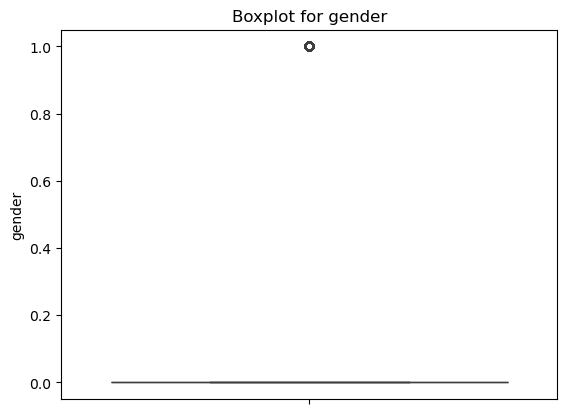

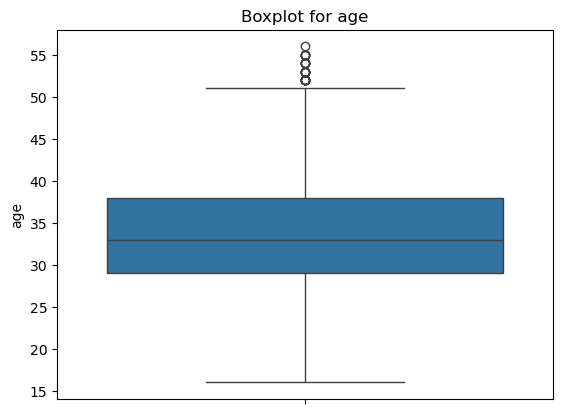

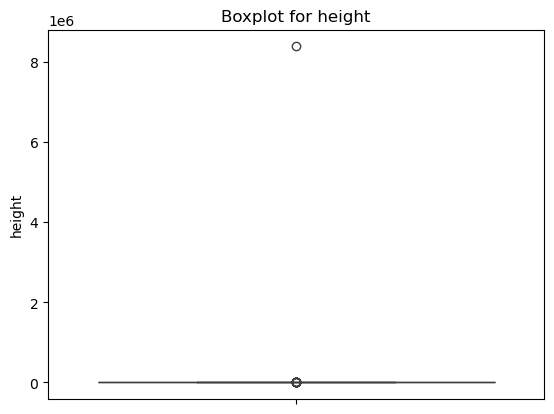

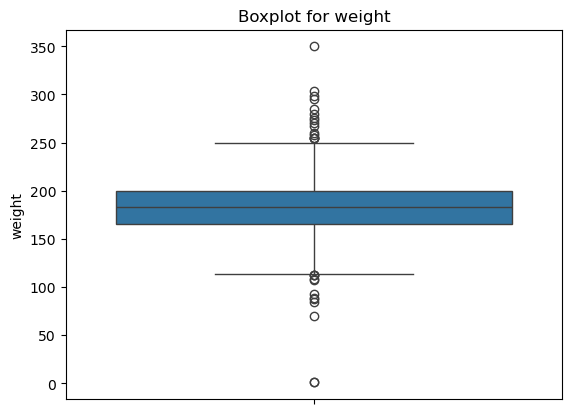

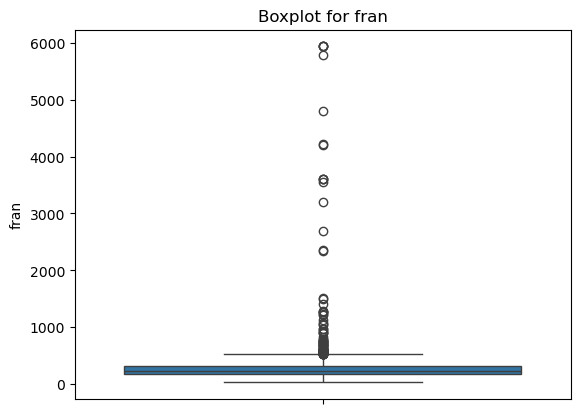

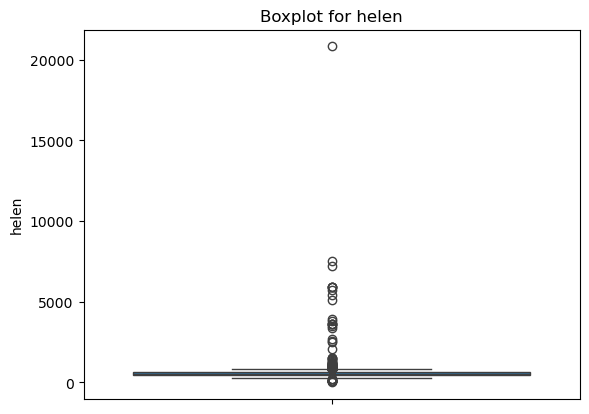

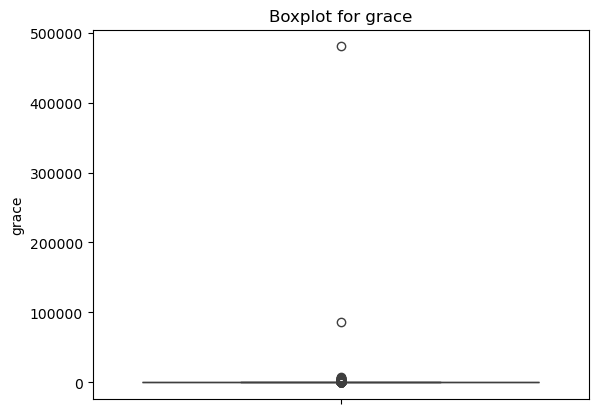

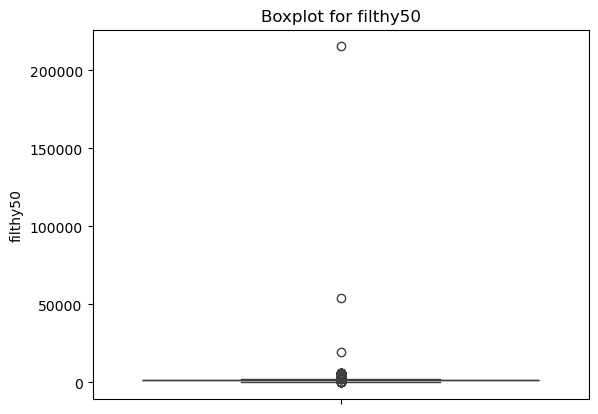

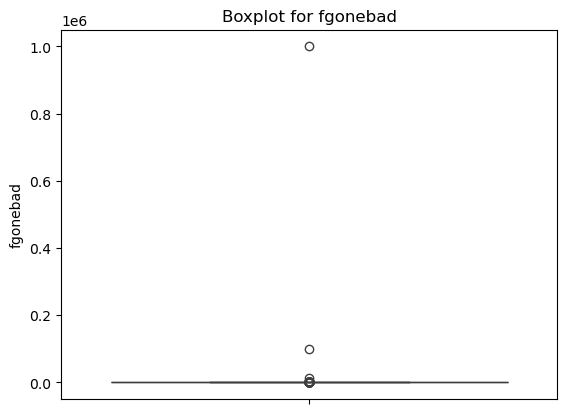

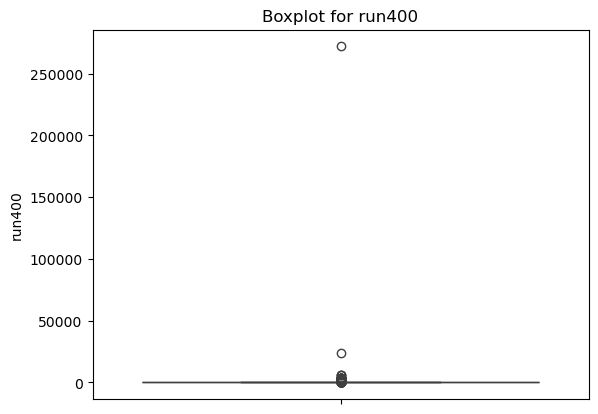

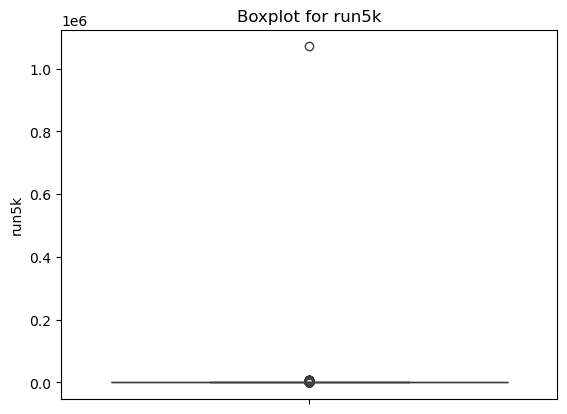

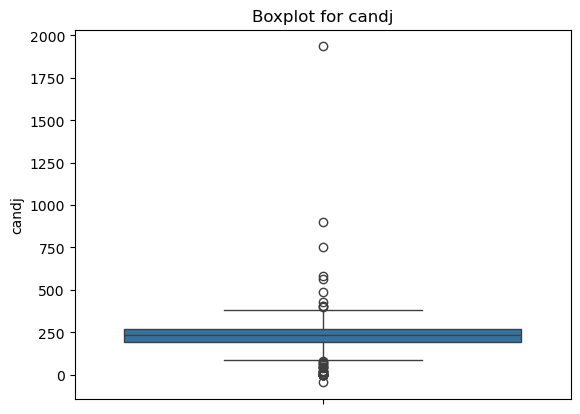

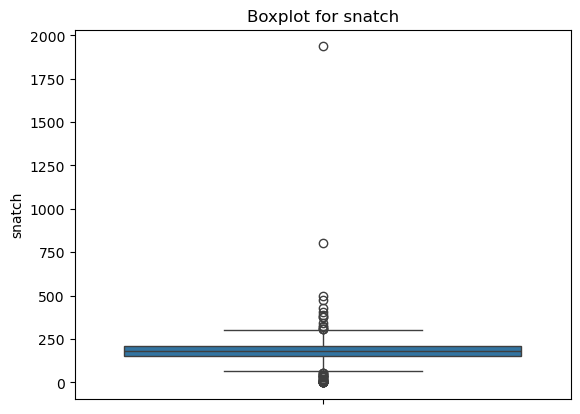

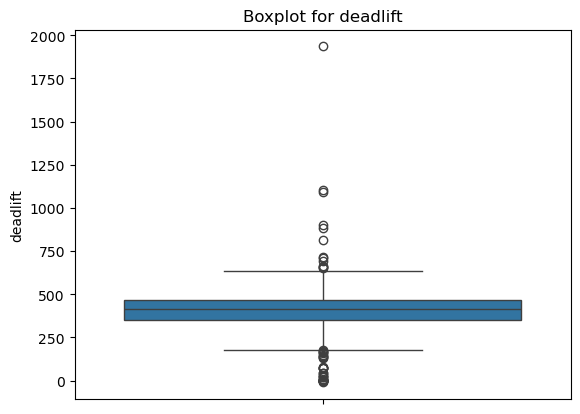

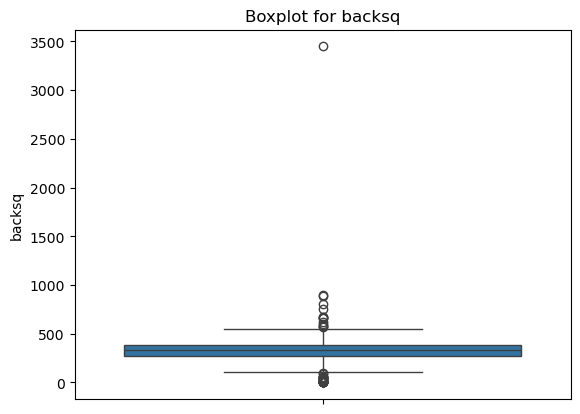

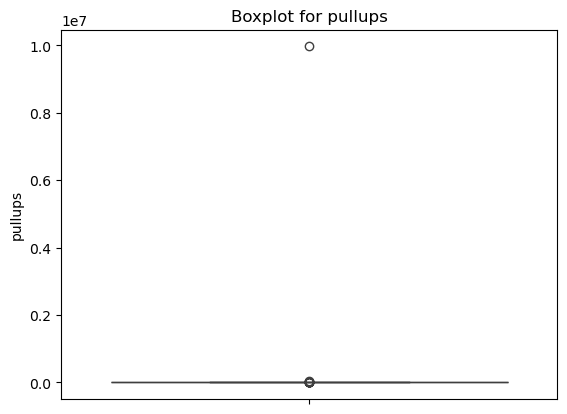

In [29]:
%matplotlib inline
# Creating and displaying boxplots for each column in the dataset to visually identify outliers

boxplot_lambda = lambda col: sns.boxplot(y=data2[col])


for col in data2.columns:
    plt.figure()
    boxplot_lambda(col)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [30]:
# Clipping the values in each column to remove extreme outliers by setting values below the 5th percentile
# and above the 95th percentile to the respective percentile values
data2=data2.clip(lower=data2.quantile(0.05), upper=data2.quantile(0.95),axis=1)

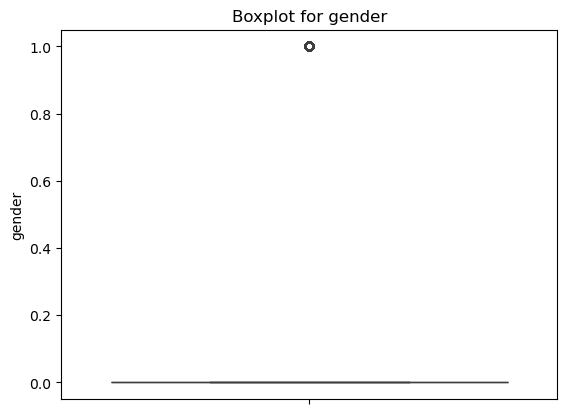

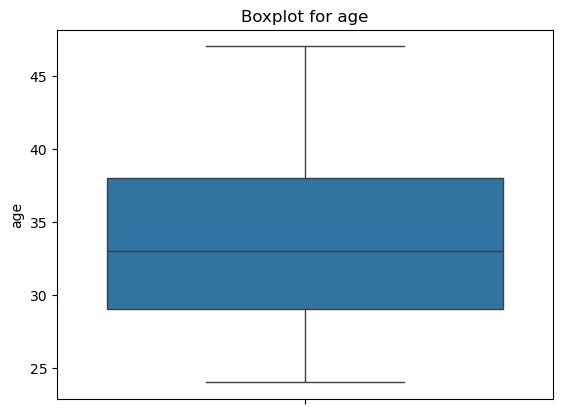

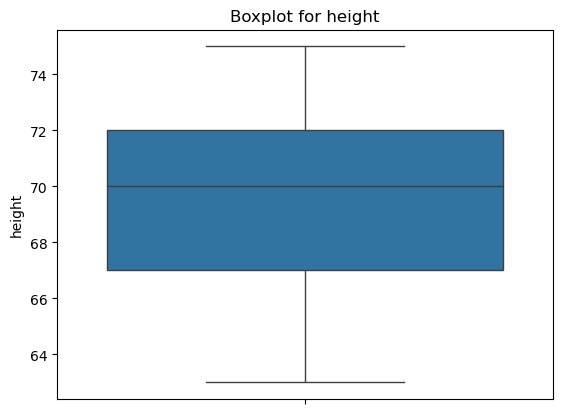

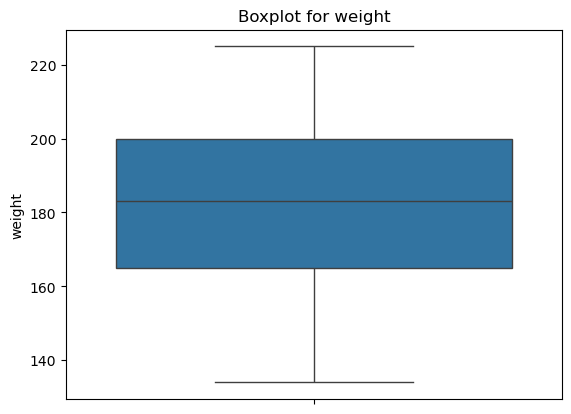

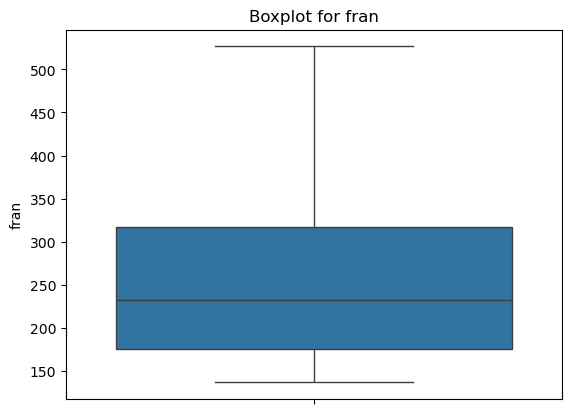

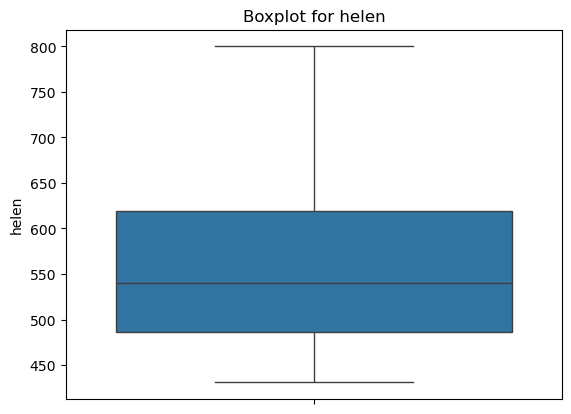

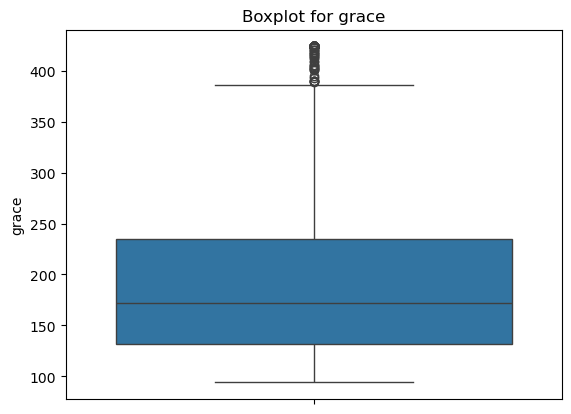

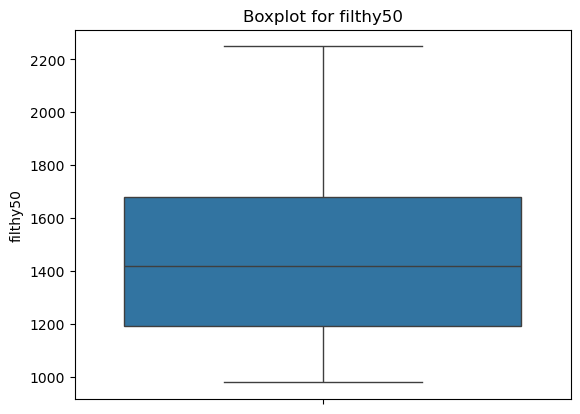

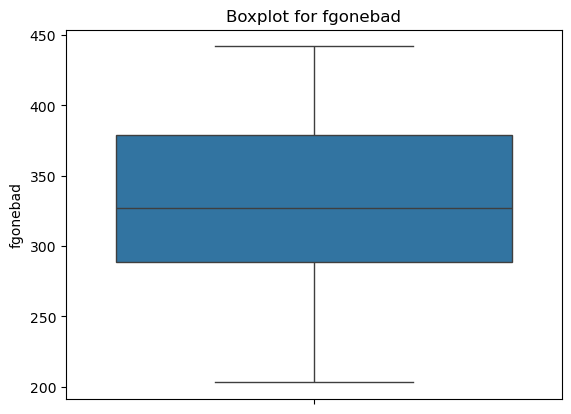

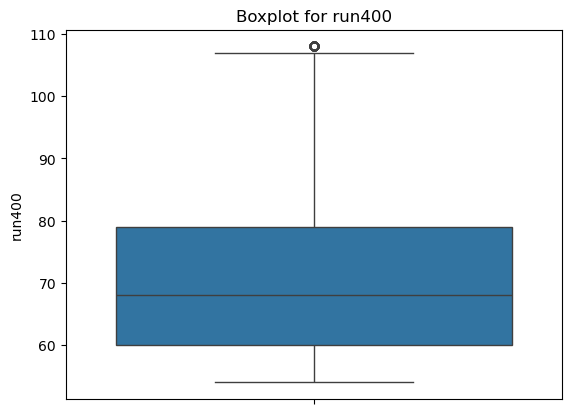

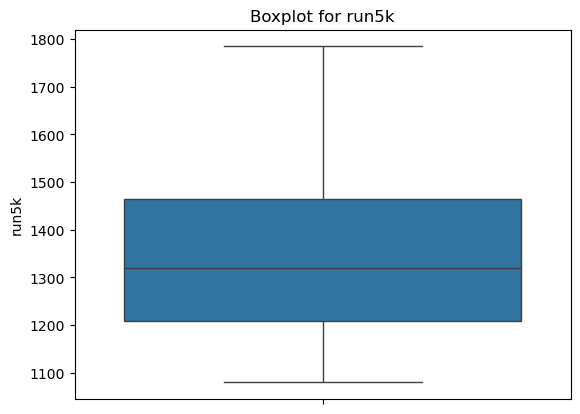

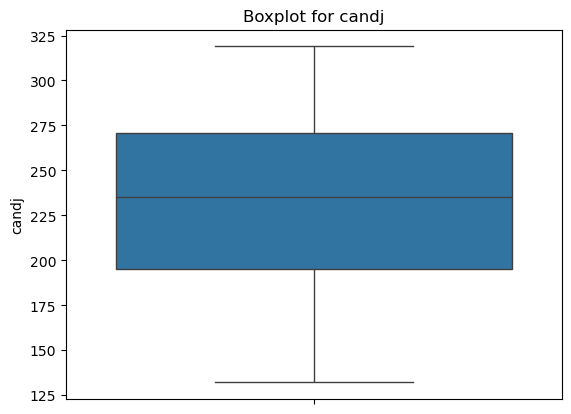

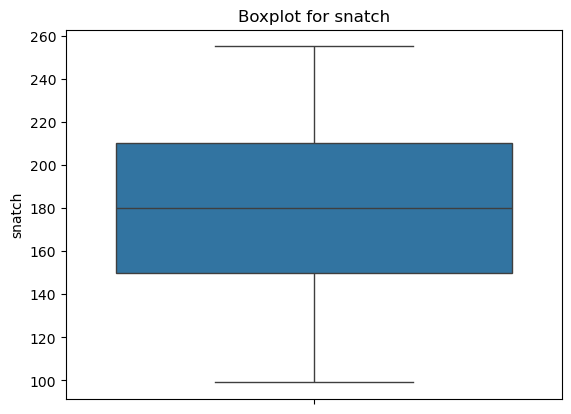

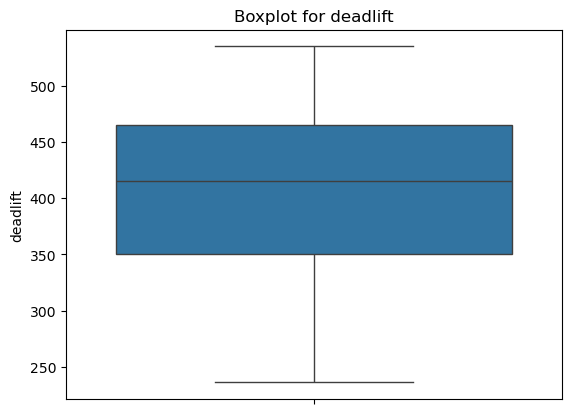

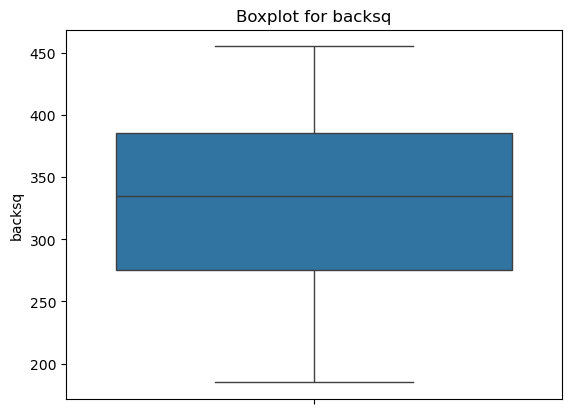

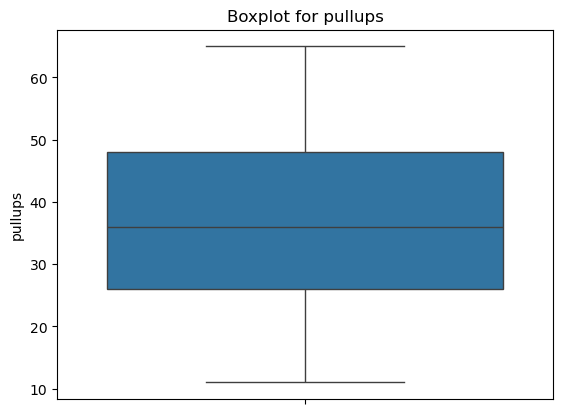

In [31]:
# Generating boxplot for each column to visually check the distribution of the data and ensure outliers are handled

boxplot_lambda = lambda col: sns.boxplot(y=data2[col])


for col in data2.columns:
    plt.figure()
    boxplot_lambda(col)
    plt.title(f'Boxplot for {col}')
    plt.show()

After handling the outliers, only Grace and Run400 still have some outliers. However, I identified that these are perfectly feasible values for these workouts, so I will keep them in the dataset.

In [32]:
data2[['grace','run400']].describe()

,grace,run400
count,2043.000000,2043.000000
mean,195.791483,71.735683
std,87.684193,14.231493
min,94.100000,54.000000
25%,132.000000,60.000000
50%,172.000000,68.000000
75%,234.500000,79.000000
max,423.900000,108.000000


In [33]:
data2.shape

(2043, 16)

In [34]:
data2.isna().sum()

gender      0
age         0
height      0
weight      0
fran        0
helen       0
grace       0
filthy50    0
fgonebad    0
run400      0
run5k       0
candj       0
snatch      0
deadlift    0
backsq      0
pullups     0
dtype: int64

In [35]:
# Plotting histograms for all numerical columns in the dataset to visualize their distributions
data2.hist(figsize=(15, 10))

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'fran'}>,
        <Axes: title={'center': 'helen'}>,
        <Axes: title={'center': 'grace'}>,
        <Axes: title={'center': 'filthy50'}>],
       [<Axes: title={'center': 'fgonebad'}>,
        <Axes: title={'center': 'run400'}>,
        <Axes: title={'center': 'run5k'}>,
        <Axes: title={'center': 'candj'}>],
       [<Axes: title={'center': 'snatch'}>,
        <Axes: title={'center': 'deadlift'}>,
        <Axes: title={'center': 'backsq'}>,
        <Axes: title={'center': 'pullups'}>]], dtype=object)

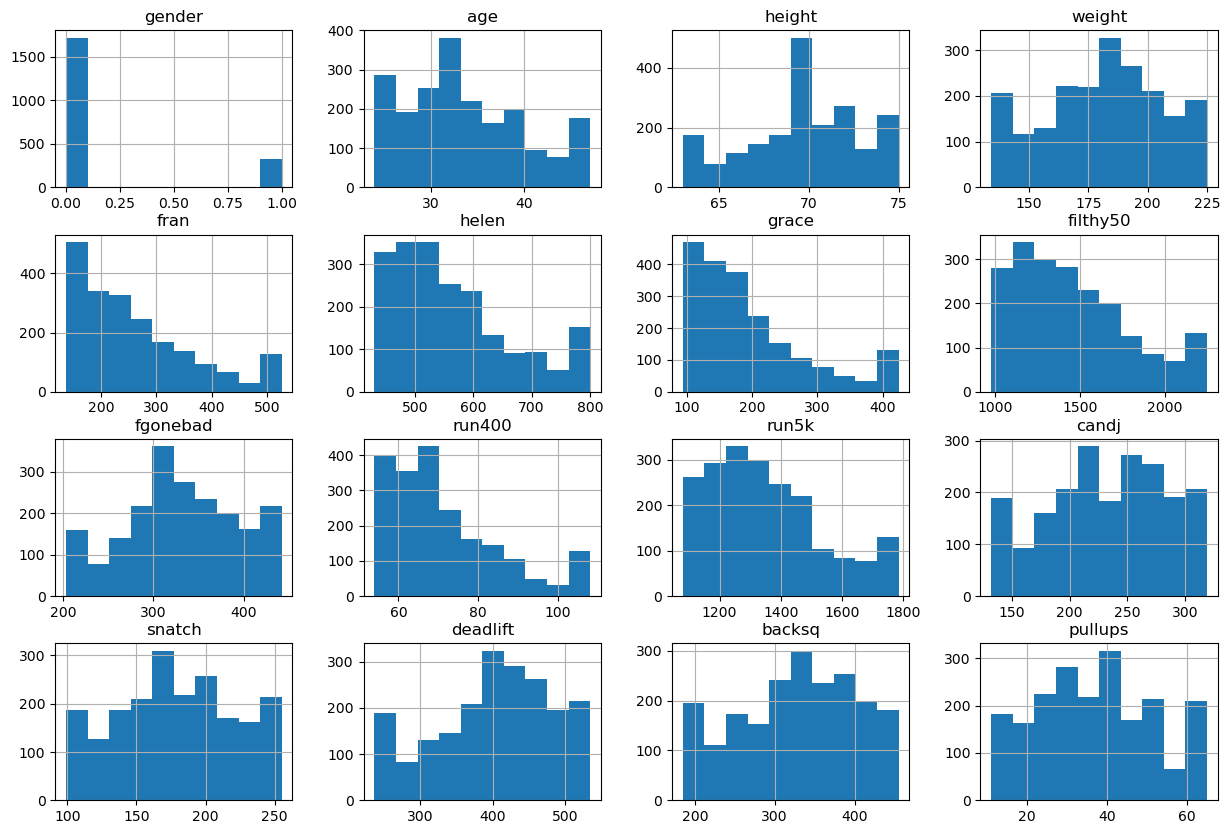

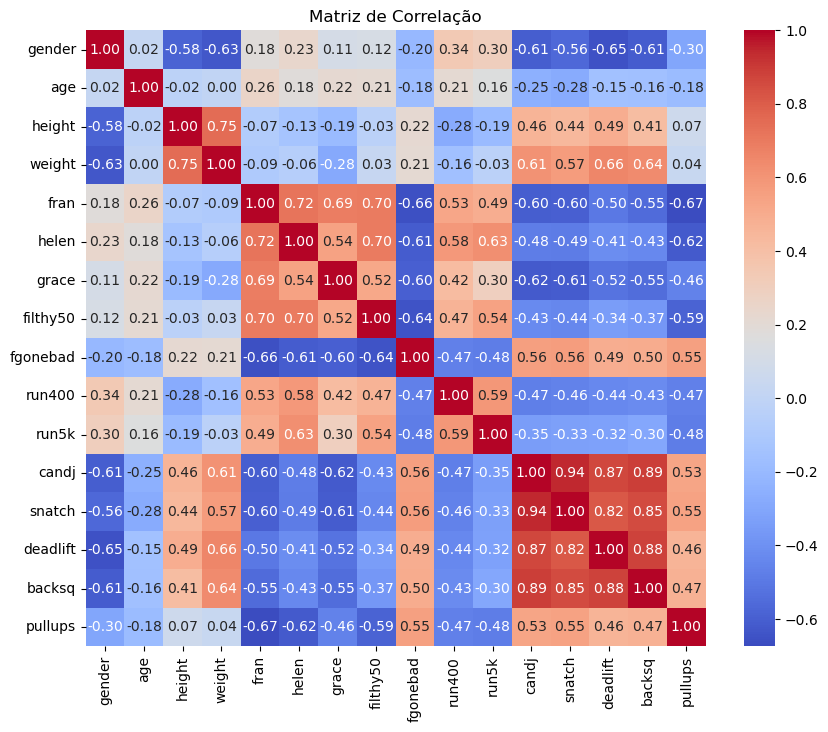

In [36]:
# Creating a correlation matrix to analyze the relationships between numerical variables
# Displaying a heatmap of the correlation matrix with annotations to visually identify strong or weak correlations between features
corr = data2.corr()

# Cria o plot de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [37]:
data2.columns

Index(['gender', 'age', 'height', 'weight', 'fran', 'helen', 'grace',
       'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch',
       'deadlift', 'backsq', 'pullups'],
      dtype='object')

Among the variables, some represent workout results, which are combinations of exercises to be completed as quickly as possible, or combinations of exercises to be performed as many times as possible within a specific time frame. Other variables are Personal Records (PRs), where only one exercise is evaluated, such as a maximum load repetition, the highest number of unbroken movements, or running a distance as fast as possible.

I have defined that the workout variables will be our dependent variables, while the PR variables will be the independent ones. Through the PRs, we will evaluate which have the greatest impact on the results of the dependent variables.

In [38]:
lista_benchmarks=['fran', 'helen', 'grace','filthy50','fgonebad']
lista_prs=['run400', 'run5k', 'candj', 'snatch','deadlift', 'backsq', 'pullups']

In [39]:
# Importing MinMaxScaler from scikit-learn to scale features into a specified range (usually between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max_scaler=MinMaxScaler()
data2[lista_benchmarks] = min_max_scaler.fit_transform(data2[lista_benchmarks])
data2[lista_prs] = min_max_scaler.fit_transform(data2[lista_prs])
data2.head()

,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
12,0,31.0,65.0,150.0,0.000000,0.000000,0.026986,0.000000,0.912097,0.129630,0.186000,0.844837,0.807569,0.765730,0.814815,1.000000
102,0,24.0,68.0,180.0,0.000000,0.048780,0.000000,0.007712,0.928841,0.074074,0.315207,0.978598,0.903784,0.799197,0.814815,1.000000
110,0,31.0,67.0,150.0,0.274570,0.149051,0.606125,0.187913,0.531185,0.166667,0.266932,0.523810,0.486851,0.581660,0.537037,0.574074
116,0,37.0,72.0,210.0,0.064152,0.138211,0.148272,0.208373,0.681875,0.222222,0.340764,0.818085,0.679282,0.966533,0.888889,0.703704
124,0,24.0,71.0,175.0,0.000000,0.127371,0.017890,0.171388,1.000000,0.000000,0.322306,0.925094,1.000000,0.899598,0.962963,1.000000


In [41]:
# Importing necessary modules for:
# - Splitting the data into training and testing sets (train_test_split)
# - Applying linear regression and random forest models (LinearRegression, RandomForestRegressor)
# - Evaluating model performance with mean squared error and R-squared metrics (mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [42]:
# Iterating through each benchmark variable, training and evaluating both Linear Regression and Random Forest models.
# - Splitting the dataset into training and testing sets
# - Training both models on the training data
# - Predicting and evaluating performance using MSE and R²
# - Displaying feature importances from the Random Forest model

for target in lista_benchmarks:
    print(f"\nTreinando modelos para a variável dependente: {target}\n")

    X = data2[lista_prs]
    y = data2[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train) 

    y_pred_lr = lr_model.predict(X_test)

    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    print(f"Regressão Linear - {target}:")
    print(f"MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print(f"Random Forest - {target}:")
    print(f"MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Variável': lista_prs,
        'Importância': feature_importances
    }).sort_values(by='Importância', ascending=False)
    
    print("\nImportância das variáveis no Random Forest:")
    print(importance_df)




Treinando modelos para a variável dependente: fran

Regressão Linear - fran:
MSE: 0.0310, R²: 0.5599
Random Forest - fran:
MSE: 0.0297, R²: 0.5787

Importância das variáveis no Random Forest:
   Variável  Importância
6   pullups     0.477647
1     run5k     0.123073
5    backsq     0.101719
2     candj     0.086928
3    snatch     0.076401
0    run400     0.071859
4  deadlift     0.062372

Treinando modelos para a variável dependente: helen

Regressão Linear - helen:
MSE: 0.0316, R²: 0.5876
Random Forest - helen:
MSE: 0.0373, R²: 0.5125

Importância das variáveis no Random Forest:
   Variável  Importância
1     run5k     0.335362
6   pullups     0.329869
0    run400     0.095586
5    backsq     0.067536
4  deadlift     0.065521
3    snatch     0.055892
2     candj     0.050234

Treinando modelos para a variável dependente: grace

Regressão Linear - grace:
MSE: 0.0413, R²: 0.3984
Random Forest - grace:
MSE: 0.0397, R²: 0.4221

Importância das variáveis no Random Forest:
   Variável  Im

# Conclusion

After identifying which variables have the greatest importance, meaning those that most influence the prediction of the workouts, I expected the results to closely mirror the correlation table, but it wasn't exactly like that. For example, for the workout Fran, the most correlated variable (among the independent variables) in the correlation table was run400, yet after running the machine learning models, Pull-up was identified as the most important, followed by run5k, with run400 coming in sixth place.

It was interesting to see that for the workout Grace, which consists of just 30 CandJ, the most important variable turned out to be CandJ itself.

As for the metrics, MSE and R² are not optimal and can be improved, but for the goal of identifying the variables that most impact the results of the workouts, they were satisfactory.

# Next Steps:
* Improve the evaluation metrics by refining the models, tuning hyperparameters, and further processing the data. Assess whether the results change after these improvements.
* Handle the ignored categorical columns through feature engineering, and then build another machine learning model to determine if these columns help predict the workout results.
* Most importantly, finding better datasets, possibly through web scraping, to develop a machine learning model capable of predicting, based on PR results and other workouts, the results of any input workout following predefined rules.